In [ ]:
## cron jobs for Santander data sourcing
## */10 * * * * /Users/fcc/Documents/synchronicity_sourcing/env/bin/python /Users/fcc/Documents/synchronicity_sourcing/synchronicity_sourcing.py
## */1440 * * * * /Users/fcc/Documents/synchronicity_sourcing/env/bin/python /Users/fcc/Documents/synchronicity_sourcing/daily_synchronicity_sourcing.py


In [1]:
## After starting mongodb in terminal by typing mongod...

from pymongo import MongoClient
import requests
import datetime
import sched, time

client = MongoClient('localhost', 27017)
db = client.synchronicity



In [22]:
## Static data 

## Bus stop locations - http://datos.santander.es/dataset/?id=paradas-bus
collection_bus_stop_locations = db.bus_stop_locations
r = requests.get("http://datos.santander.es/api/rest/datasets/paradas_bus.json")

for i in r.json()['resources']:
    post = {"wgs84_pos:long": i["wgs84_pos:long"], 
            "ayto:numero": i["ayto:numero"],
            "gn:coordY": i["gn:coordY"],
            "gn:coordX": i["gn:coordX"],
            "ayto:sentido": i["ayto:sentido"],
            "vivo:address1": i["vivo:address1"],
            "dc:modified": i["dc:modified"],
            "wgs84_pos:lat": i["wgs84_pos:lat"],
            "ayto:parada": i["ayto:parada"],
            "dc:identifier": i["dc:identifier"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_bus_stop_locations.insert_one(post).inserted_id
    
## Bus lines - http://datos.santander.es/dataset/?id=lineas-bus
collection_bus_lines = db.bus_lines
r = requests.get("http://datos.santander.es/api/rest/datasets/lineas_bus.json")

for i in r.json()['resources']:
    post = {"ayto:numero": i["ayto:numero"], 
            "dc:name": i["dc:name"],
            "dc:modified": i["dc:modified"],
            "dc:identifier": i["dc:identifier"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_bus_lines.insert_one(post).inserted_id
    
## Bus stops per line - http://datos.santander.es/dataset/?id=lineas-bus
collection_bus_stops_per_line = db.bus_stops_per_line
r = requests.get("http://datos.santander.es/api/rest/datasets/lineas_bus_paradas.json")

for i in r.json()['resources']:
    post = {"wgs84_pos:long": i["wgs84_pos:long"], 
            "gn:coordY": i["gn:coordY"],
            "gn:coordX": i["gn:coordX"],
            "ayto:linea": i["ayto:linea"],
            "dc:modified": i["dc:modified"],
            "wgs84_pos:lat": i["wgs84_pos:lat"],
            "ayto:parada": i["ayto:parada"],
            "dc:identifier": i["dc:identifier"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_bus_stops_per_line.insert_one(post).inserted_id
    
## Disabled Parking spots - http://datos.santander.es/dataset/?id=plazas-pmr
collection_disabled_parking_spots = db.disabled_parking_spots
r = requests.get("http://datos.santander.es/api/rest/datasets/plazas_pmr_nofoto.json")

for i in r.json()['resources']:
    post = {"ayto:UtmY": i["ayto:UtmY"], 
            "ayto:CodTipoSenal": i["ayto:CodTipoSenal"],
            "ayto:PlazasCordon": i["ayto:PlazasCordon"], # How many squares in cord are contemplated under this signal of traffic
            "ayto:GrupoSenal": i["ayto:GrupoSenal"],
            "ayto:UtmX": i["ayto:UtmX"],
            "ayto:Autorizacion": i["ayto:Autorizacion"], # Internal number used by the City Council to identify the signal
            "ayto:FamiliaSenal": i["ayto:FamiliaSenal"],
            "ayto:Indicacion": i["ayto:Indicacion"],
            "ayto:NumeroPostal": i["ayto:NumeroPostal"],
            "ayto:CodCalle": i["ayto:CodCalle"], 
            "ayto:FechaColocacion": i["ayto:FechaColocacion"], # Date on which the PMR square was enabled
            "ayto:Regulacion": i["ayto:Regulacion"],  # Indicates whether the seats have OLA regulation or are free to use.           
            "ayto:CompartePoste": i["ayto:CompartePoste"], # Indicates if the signal shares a pole with another traffic signal. (0-No, 1-Yes)
            "ayto:UtmZone": i["ayto:UtmZone"],
            "ayto:TipoSenal": i["ayto:TipoSenal"],
            "ayto:NombreCalle": i["ayto:NombreCalle"],
            "ayto:lonWGS84": i["ayto:lonWGS84"],
            "ayto:latWGS84": i["ayto:latWGS84"],
            "ayto:PlazasBateria": i["ayto:PlazasBateria"], # How many seats in battery are contemplated under this signal of traffic
            "ayto:SubgrupoSenal": i["ayto:SubgrupoSenal"],
            "ayto:CategoriaSenal": i["ayto:CategoriaSenal"],
            "ayto:Propiedad": i["ayto:Propiedad"],
            "dc:identifier": i["dc:identifier"],
            "ayto:IdIcono": i["ayto:IdIcono"],
            "ayto:lonED50": i["ayto:lonED50"],
            "ayto:latED50": i["ayto:latED50"],
            "ayto:FechaRevision": i["ayto:FechaRevision"],
            "dc:modified": i["dc:modified"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_disabled_parking_spots.insert_one(post).inserted_id
    
## Underground parking data - http://datos.santander.es/dataset/?id=aparcamientos-subterraneos
collection_underground_parking_spots = db.underground_parking_spots
r = requests.get("http://datos.santander.es/api/rest/datasets/puntos_interes_aparcamiento_subterraneo.json")

for i in r.json()['resources']:
    post = {"ayto:Tipo": i["ayto:Tipo"], 
            "ayto:Nombre": i["ayto:Nombre"],
            "ayto:Email": i["ayto:Email"], 
            "ayto:Fax": i["ayto:Fax"],
            "ayto:Direccion": i["ayto:Direccion"],
            "ayto:DescripcionCortaUK": i["ayto:DescripcionCortaUK"], 
            "ayto:Telefono": i["ayto:Telefono"],
            "ayto:imagenURL": i["ayto:imagenURL"],
            "dc:identifier": i["dc:identifier"],
            "ayto:Horario": i["ayto:Horario"], 
            "ayto:DescripcionCorta": i["ayto:DescripcionCorta"], 
            "ayto:latitud": i["ayto:latitud"], 
            "ayto:DescripcionLarga": i["ayto:DescripcionLarga"], 
            "ayto:Web": i["ayto:Web"],
            "ayto:longitud": i["ayto:longitud"],
            "ayto:DescripcionLargaUK": i["ayto:DescripcionLargaUK"],
            "dc:modified": i["dc:modified"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_underground_parking_spots.insert_one(post).inserted_id

    
## Taxi spots - http://datos.santander.es/dataset/?id=paradas-taxis
## BROKEN

## Bicycle stations - http://datos.santander.es/dataset/?id=estaciones-bicicletas
collection_bicycle_stations = db.underground_bicycle_stations
r = requests.get("http://datos.santander.es/api/rest/datasets/tusbic_estaciones.json")

for i in r.json()['resources']:
    post = {"ayto:nombre": i["ayto:nombre"], 
            "ayto:direccion": i["ayto:direccion"],
            "ayto:longitud": i["ayto:longitud"],
            "ayto:total_puestos": i["ayto:total_puestos"], 
            "dc:modified": i["dc:modified"],
            "ayto:latitud": i["ayto:latitud"], 
            "dc:identifier": i["dc:identifier"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_bicycle_stations.insert_one(post).inserted_id
    
## Traffic signals - http://datos.santander.es/dataset/?id=senales-de-trafico
collection_traffic_signals = db.traffic_signals
r = requests.get("http://datos.santander.es/api/rest/datasets/tusbic_estaciones.json")

for i in r.json()['resources']:
    post = {"ayto:UtmY": i["ayto:UtmY"], 
            "ayto:CodTipoSenal": i["ayto:CodTipoSenal"],
            "ayto:GrupoSenal": i["ayto:GrupoSenal"],
            "ayto:UtmX": i["ayto:UtmX"],
            "ayto:Autorizacion": i["ayto:Autorizacion"],
            "ayto:FamiliaSenal": i["ayto:FamiliaSenal"],
            "ayto:Indicacion": i["ayto:Indicacion"],
            "ayto:NumeroPostal": i["ayto:NumeroPostal"],
            "ayto:CodCalle": i["ayto:CodCalle"],
            "ayto:FechaColocacion": i["ayto:FechaColocacion"],
            "ayto:CompartePoste": i["ayto:CompartePoste"],
            "ayto:UtmZone": i["ayto:UtmZone"],
            "ayto:TipoSenal": i["ayto:TipoSenal"],
            "ayto:NombreCalle": i["ayto:NombreCalle"],
            "ayto:lonWGS84": i["ayto:lonWGS84"],
            "ayto:latWGS84": i["ayto:latWGS84"],
            "ayto:SubgrupoSenal": i["ayto:SubgrupoSenal"],
            "ayto:CategoriaSenal": i["ayto:CategoriaSenal"],
            "ayto:Propiedad": i["ayto:Propiedad"],
            "dc:identifier": i["dc:identifier"],
            "ayto:IdIcono": i["ayto:IdIcono"],
            "ayto:lonED50": i["ayto:lonED50"],
            "ayto:latED50": i["ayto:latED50"],
            "ayto:FechaRevision": i["ayto:FechaRevision"],
            "dc:modified": i["dc:modified"],
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_traffic_signals.insert_one(post).inserted_id
    
## Motorcycle spots - http://datos.santander.es/dataset/?id=plazas-motocicleta
## BROKEN


## Loading/Unloading spots - http://datos.santander.es/dataset/?id=zonas-carga-descarga
## BROKEN

## Zones 30 speed limits - http://datos.santander.es/dataset/?id=zonas-30 
collection_zones_thirty = db.zones_thirty
r = requests.get("http://datos.santander.es/api/rest/datasets/zonas_30.json")
for i in r.json()['resources']:
    post = {"ayto:Nota": i["ayto:Nota"], 
            "dc:modified": i["dc:modified"], 
            "dc:identifier": i["dc:identifier"], 
            "ayto:WKT": i["ayto:WKT"], 
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_zones_thirty.insert_one(post).inserted_id

## Parking area limitations - http://datos.santander.es/dataset/?id=zonas-ola
collection_ola_zones = db.ola_zones
r = requests.get("http://datos.santander.es/api/rest/datasets/zonas_ola.json")
for i in r.json()['resources']:
    post = {"dc:modified": i["dc:modified"], 
            "dc:identifier": i["dc:identifier"], 
            "ayto:Zona": i["ayto:Zona"], 
            "ayto:WKT": i["ayto:WKT"], 
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_ola_zones.insert_one(post).inserted_id

## Bike lane sections - http://datos.santander.es/dataset/?id=carril-bici
collection_bike_lanes = db.bike_lanes
r = requests.get("http://datos.santander.es/api/rest/datasets/carril_bici.json")

for i in r.json()['resources']:
    post = {"ayto:Estado": i["ayto:Estado"], 
            "dc:modified": i["dc:modified"], 
            "dc:identifier": i["dc:identifier"], 
            "ayto:WKT": i["ayto:WKT"], 
            "uri": i["uri"],
            "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
    collection_bike_lanes.insert_one(post).inserted_id
    
    

In [ ]:
## Live data

## get or create the collection the collection
collection_arrival_times = db.stop_arrival_times
collection_bus_location = db.bus_location
collection_traffic_measurements = db.traffic_measurements
collection_surface_parking_sensors = db.surface_parking_sensors
collection_traffic_intensity_sensors = db.traffic_intensity_sensors
collection_state_bicycle_stations = db.state_bicycle_stations

collection_irrigation_sensors = db.irrigation_sensors
collection_environment_sensors = db.environment_sensors

collection_mobile_environment_sensors = db.mobile_environment_sensors

## setup the scheduler
s = sched.scheduler(time.time, time.sleep)

def run_scheduler(sc): 
    ## API links
    r_stop_arrival_times = requests.get("http://datos.santander.es/api/rest/datasets/control_flotas_estimaciones.json")
    r_bus_location = requests.get("http://datos.santander.es/api/rest/datasets/control_flotas_posiciones.json")
    r_traffic_measurements = requests.get("http://datos.santander.es/api/rest/datasets/mediciones.json")
    r_surface_parking_sensors = requests.get("http://datos.santander.es/api/rest/datasets/sensores_smart_parking.json")
    r_traffic_intensity_sensors = requests.get("http://datos.santander.es/api/rest/datasets/sensores_smart_traffic_intensity.json")
    r_state_bicycle_stations = requests.get("http://datos.santander.es/api/rest/datasets/tusbic_puestos_libres.json")
    r_state_irrigation_sensors = requests.get("http://datos.santander.es/api/rest/datasets/sensores_smart_irrigation.json")
    r_state_environment_sensors = requests.get("http://datos.santander.es/api/rest/datasets/sensores_smart_env_monitoring.json")
    r_mobile_environment_sensors = requests.get("http://datos.santander.es/api/rest/datasets/sensores_smart_mobile.json")

    ## Loop through the response and add documents to database
    
    ## Bus feeds - http://datos.santander.es/dataset/?id=control-flota-autobuses
    for i in r_stop_arrival_times.json()['resources']:
        post = {"ayto:tiempo1": i["ayto:tiempo1"], 
                "ayto:distancia2": i["ayto:distancia2"],
                "ayto:destino1": i["ayto:destino1"],
                "ayto:distancia1": i["ayto:distancia1"],
                "ayto:tiempo2": i["ayto:tiempo2"],
                "ayto:paradaId": i["ayto:paradaId"],
                "ayto:destino2": i["ayto:destino2"],
                "ayto:fechActual": i["ayto:fechActual"],
                "dc:identifier": i["dc:identifier"],
                "ayto:etiqLinea": i["ayto:etiqLinea"],
                "uri": i["uri"],
                "dc:modified": i["dc:modified"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_arrival_times.insert_one(post).inserted_id
    
    for i in r_bus_location.json()['resources']:
        post = {"wgs84_pos:long": i["wgs84_pos:long"], 
                "ayto:instante": i["ayto:instante"],
                "gn:coordY": i["gn:coordY"],
                "gn:coordX": i["gn:coordX"],
                "ayto:indice": i["ayto:indice"],
                "ayto:linea": i["ayto:linea"],
                "ayto:velocidad": i["ayto:velocidad"],
                "dc:modified": i["dc:modified"],
                "ayto:coche": i["ayto:coche"],
                "ayto:vehiculo": i["ayto:vehiculo"],
                "wgs84_pos:lat": i["wgs84_pos:lat"],
                "ayto:servicio": i["ayto:servicio"],
                "ayto:estado": i["ayto:estado"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_bus_location.insert_one(post).inserted_id
        
    ## Traffic Measurements - http://datos.santander.es/dataset/?id=datos-trafico
    for i in r_traffic_measurements.json()['resources']:
        post = {"ayto:ocupacion": i["ayto:ocupacion"], # percentage of time of the loop that is occupied by a vehicle (%)
                "ayto:medida": i["ayto:medida"], # Sensor Identifier. This data serves to identify each sensor univocally, and to link each sensor with its geometry located within the resource, "Location of Sensors".
                "ayto:idSensor": i["ayto:idSensor"],
                "ayto:intensidad": i["ayto:intensidad"], # number of vehicles counted, expanded to the hour (veh / h)
                "dc:modified": i["dc:modified"],
                "dc:identifier": i["dc:identifier"],
                "ayto:carga": i["ayto:carga"], # represents an estimate of the degree of congestion based on an algorithm that uses intensity and occupation as factors.
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_traffic_measurements.insert_one(post).inserted_id   
        
    ## Surface Parking Sensors - http://datos.santander.es/dataset/?id=sensores-parking-superficie
    for i in r_surface_parking_sensors.json()['resources']:
        post = {"ayto:type": i["ayto:type"], 
                "ayto:status": i["ayto:status"], # indicates whether the square is occupied, value a true, or not, value a false.
                "ayto:latitude": i["ayto:latitude"],
                "dc:modified": i["ayto:modified"], 
                "dc:identifier": i["dc:identifier"],
                "ayto:longitude": i["dc:longitude"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_surface_parking_sensors.insert_one(post).inserted_id       

    ## Traffic Intensity sensors - http://datos.santander.es/dataset/?id=intensidad-trafico
    for i in r_traffic_intensity_sensors.json()['resources']:
        post = {"ayto:count": i["ayto:count"], 
                "ayto:type": i["ayto:type"], 
                "ayto:latitude": i["ayto:latitude"],
                "ayto:average_speed": i["ayto:average_speed"], 
                "ayto:occupancy": i["dc:occupancy"],
                "dc:modified": i["dc:modified"],
                "ayto:median_speed": i["dc:median_speed"],
                "dc:identifier": i["dc:identifier"],
                "ayto:longitude": i["dc:longitude"],                                
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_traffic_intensity_sensors.insert_one(post).inserted_id       

    ## Bicycle states sensors - http://datos.santander.es/dataset/?id=estado-estaciones-bicicletas
    for i in r_state_bicycle_stations.json()['resources']:
        post = {"ayto:bicicletas_libres": i["ayto:bicicletas_libres"], 
                "ayto:puestos_libres": i["ayto:puestos_libres"], 
                "dc:modified": i["dc:modified"],
                "dc:identifier": i["dc:identifier"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_state_bicycle_stations.insert_one(post).inserted_id     
        
    ## Irrigation sensors - http://datos.santander.es/dataset/?id=sensores-riego   
    for i in r_state_irrigation_sensors.json()['resources']:
        post = {"ayto:soilMoistureTension": i["ayto:soilMoistureTension"], 
                "ayto:temperature": i["ayto:temperature"], 
                "dc:modified": i["dc:modified"],
                "ayto:windDirection": i["ayto:windDirection"],
                "ayto:rainfall": i["ayto:rainfall"],
                "ayto:radiationPAR": i["ayto:radiationPAR"],
                "ayto:solarRadiation": i["ayto:solarRadiation"],
                "ayto:windSpeed": i["ayto:windSpeed"],
                "ayto:groundTemperature": i["ayto:groundTemperature"],
                "ayto:latitude": i["ayto:latitude"],
                "ayto:atmosphericPressure": i["ayto:atmosphericPressure"],
                "dc:identifier": i["dc:identifier"],
                "ayto:longitude": i["ayto:longitude"],
                "ayto:type": i["ayto:type"],
                "ayto:battery": i["ayto:battery"],
                "ayto:relativeHumidity": i["ayto:relativeHumidity"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_irrigation_sensors.insert_one(post).inserted_id 

    ## Environmental sensors - http://datos.santander.es/dataset/?id=sensores-ambientales
    for i in r_state_environment_sensors.json()['resources']:
        post = {"ayto:type": i["ayto:type"], 
                "ayto:noise": i["ayto:noise"], 
                "ayto:battery": i["ayto:battery"],
                "ayto:latitude": i["ayto:latitude"],
                "ayto:temperature": i["ayto:temperature"],
                "dc:identifier": i["dc:identifier"],
                "dc:modified": i["dc:modified"],
                "ayto:longitude": i["ayto:longitude"],
                "ayto:light": i["ayto:light"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_environment_sensors.insert_one(post).inserted_id 

    ## Mobile environmental sensors - http://datos.santander.es/resource/?ds=sensores-moviles
    for i in r_mobile_environment_sensors.json()['resources']:
        post = {"ayto:particles": i["ayto:particles"], 
                "ayto:NO2": i["ayto:NO2"], 
                "ayto:type": i["ayto:type"],
                "ayto:latitude": i["ayto:latitude"],
                "ayto:temperature": i["ayto:temperature"],
                "ayto:altitude": i["ayto:altitude"],
                "ayto:speed": i["ayto:speed"],
                "ayto:CO": i["ayto:CO"],
                "dc:modified": i["dc:modified"],
                "dc:identifier": i["dc:identifier"],
                "ayto:longitude": i["ayto:longitude"],
                "ayto:odometer": i["ayto:odometer"],
                "ayto:course": i["ayto:course"],
                "ayto:ozone": i["ayto:ozone"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_mobile_environment_sensors.insert_one(post).inserted_id 
        
    s.enter(60, 1, run_scheduler, (sc,))

s.enter(60, 1, run_scheduler, (s,))
s.run()

In [14]:
## Daily updates

## Daily bus locations as served by the api - http://datos.santander.es/dataset/?id=control-flota-autobuses
collection_bus_location_daily = db.bus_location_daily
## Bus stops sequences (May inform for any route changes) - http://datos.santander.es/dataset/?id=lineas-bus
collection_bus_stops_sequences_daily = db.bus_stops_sequences_daily
s = sched.scheduler(time.time, time.sleep)

def run_scheduler(sc): 
    ## API links
    r_bus_location_daily = requests.get("http://datos.santander.es/api/rest/datasets/control_flotas_estimaciones.json")
    r_bus_stops_sequences_daily = requests.get("http://datos.santander.es/api/rest/datasets/lineas_bus_secuencia.json")

    ## Loop through the response and add documents to database
    for i in r_bus_location_daily.json()['resources']:
        post = {"ayto:instante": i["ayto:instante"], 
                "ayto:linea": i["ayto:linea"],
                "ayto:descparada": i["ayto:descparada"],
                "ayto:coche": i["ayto:coche"],
                "dc:modified": i["dc:modified"],
                "ayto:parada": i["ayto:parada"],
                "dc:identifier": i["dc:identifier"],
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        collection_bus_location_daily.insert_one(post).inserted_id
        


    for i in r_bus_stops_sequences_daily.json()['resources']:
        post = {"ayto:Ruta": i["ayto:Ruta"], 
                "ayto:PuntoKM": i["ayto:PuntoKM"], # Distance between the beginning of the route, and each stop of the sequence. Sorting by this field would obtain the sequence of each lines / subline / route. Keep in mind that, every time there is a change of section in the route, the KM counter is set to 0, so to know the total distance of the LINE you would have to add the distances of the last stops of each SECTION . To know the distance of a stop from the head, you would have to add the maximum distance of the sections prior to that stop, and the KM of that particular stop.
                "ayto:NParada": i["ayto:NParada"],
                "dc:EtiquetaLinea": i["dc:EtiquetaLinea"],
                "dc:modified": i["dc:modified"],
                "ayto:Linea": i["ayto:Linea"],
                "ayto:Seccion": i["ayto:Seccion"],
                "ayto:SentidoRuta": i["ayto:SentidoRuta"], # It informs if the route is of 1-Ida or 2-Return
                "dc:identifier": i["dc:identifier"],
                "ayto:NombreSublinea": i["ayto:NombreSublinea"],
                "ayto:NombreParada": i["ayto:NombreParada"],
                "ayto:PosX": i["ayto:PosX"], # UTM coordinates ED50 of the stop position.
                "ayto:PosY": i["ayto:PosY"], # UTM coordinates ED50 of the stop position.
                "uri": i["uri"],
                "latestUpdate": datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}    
        bus_stops_sequences_daily.insert_one(post).inserted_id
    

    s.enter(86400, 1, run_scheduler, (sc,))

s.enter(86400, 1, run_scheduler, (s,))
s.run()

### Synchtonicity Exploring


In [229]:
df_surface_parking_sensors

,Unnamed: 0,_id,ayto:latitude,ayto:longitude,ayto:status,ayto:type,dc:identifier,latestUpdate,uri
dc:modified,,,,,,,,,
2018-05-09 12:55:17+02:00,0,5af2f015e4195406893c9927,43.462918,-3.803268,0,parking,3614,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:55:07+02:00,1,5af2f015e4195406893c9928,43.462925,-3.803205,0,parking,3615,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:54:15+02:00,2,5af2f015e4195406893c9929,43.463244,-3.799930,1,parking,3646,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:53:57+02:00,3,5af2f015e4195406893c992a,43.463078,-3.801646,1,parking,3629,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:53:29+02:00,4,5af2f015e4195406893c992b,43.463249,-3.799871,1,parking,3647,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:53:19+02:00,5,5af2f015e4195406893c992c,43.462970,-3.802751,1,parking,3912,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:52:55+02:00,6,5af2f015e4195406893c992d,43.463209,-3.800278,0,parking,3640,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:52:49+02:00,7,5af2f015e4195406893c992e,43.463256,-3.799819,0,parking,3648,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:52:23+02:00,8,5af2f015e4195406893c992f,43.462505,-3.800259,0,parking,3720,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...


In [3]:
from pymongo import MongoClient
import mplleaflet 
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

client = MongoClient('localhost', 27017)
db = client.synchronicity_

In [4]:
db.collection_names()

['stop_arrival_times',
 'bus_stop_locations',
 'bus_location_daily',
 'bike_lanes',
 'bus_location',
 'surface_parking_sensors',
 'environment_sensors',
 'irrigation_sensors',
 'traffic_intensity_sensors',
 'zones_thirty',
 'state_bicycle_stations',
 'disabled_parking_spots',
 'bus_lines',
 'mobile_environment_sensors',
 'traffic_measurements',
 'traffic_signals',
 'bus_stops_sequences_daily',
 'bus_stops_per_line',
 'underground_bicycle_stations',
 'underground_parking_spots',
 'ola_zones']

In [73]:
df_surface_parking_sensors = pd.DataFrame(columns = ['_id', 'ayto:latitude', 'ayto:longitude',
                                                    'ayto:status', 'ayto:type', 'dc:identifier',
                                                    'dc:modified', 'latestUpdate', 'uri'])
for i in range(0, 4086759, 50000):
    print(i,end=',')
    temp = pd.DataFrame.from_dict(list(db.surface_parking_sensors.find()[i:i+50000]),
                                              orient='columns')

    df_surface_parking_sensors = df_surface_parking_sensors.append(temp)
    

0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1600000,1650000,1700000,1750000,1800000,1850000,1900000,1950000,2000000,2050000,2100000,2150000,2200000,2250000,2300000,2350000,2400000,2450000,2500000,2550000,2600000,2650000,2700000,2750000,2800000,2850000,2900000,2950000,3000000,3050000,3100000,3150000,3200000,3250000,3300000,3350000,3400000,3450000,3500000,3550000,3600000,3650000,3700000,3750000,3800000,3850000,3900000,3950000,4000000,4050000,

In [78]:
df_surface_parking_sensors.to_csv('synchronicity_parking.csv')

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
df_surface_parking_sensors = pd.read_csv('synchronicity_parking.csv')
df_surface_parking_sensors['dc:modified'] =  pd.to_datetime(df_surface_parking_sensors['dc:modified'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')

df_surface_parking_sensors['latestUpdate'] =  pd.to_datetime(df_surface_parking_sensors['latestUpdate'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')


In [11]:
df_surface_parking_sensors['minute'] = df_surface_parking_sensors['dc:modified'].apply(lambda x: x.minute)

df_surface_parking_sensors['hour'] = df_surface_parking_sensors['dc:modified'].apply(lambda x: x.hour)



In [21]:
df_surface_parking_sensors[(df_surface_parking_sensors['minute'] < 1)].drop_duplicates(subset=['minute', 'hour'])

,Unnamed: 0,_id,ayto:latitude,ayto:longitude,ayto:status,ayto:type,dc:identifier,dc:modified,latestUpdate,uri,minute,hour
129,129,5af2f015e4195406893c99a8,43.463197,-3.800435,1,parking,3637,2018-05-09 07:00:31,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...,0,7
286,286,5af2f015e4195406893c9a45,43.463869,-3.799786,1,parking,3813,1970-01-01 00:00:08,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...,0,0
1460,1460,5af2f154e4195406893ccaf5,43.462762,-3.799518,0,parking,3802,2018-05-09 11:00:54,2018-05-09 14:02:12,http://datos.santander.es/api/datos/sensores_s...,0,11
8507,8507,5af3213be4195406893db772,43.462715,-3.799510,1,parking,3803,2018-05-09 14:00:59,2018-05-09 17:26:35,http://datos.santander.es/api/datos/sensores_s...,0,14
8560,8560,5af3213be4195406893db7a7,43.464508,-3.797995,1,parking,3864,2018-05-09 13:00:42,2018-05-09 17:26:35,http://datos.santander.es/api/datos/sensores_s...,0,13
8783,8783,5af33d94e4195406893dc161,43.464360,-3.799406,1,parking,3908,2018-05-09 16:00:37,2018-05-09 19:27:32,http://datos.santander.es/api/datos/sensores_s...,0,16
10559,10559,5af40096e4195406893dfab6,43.464401,-3.798904,1,parking,3853,2018-05-10 06:00:15,2018-05-10 09:19:34,http://datos.santander.es/api/datos/sensores_s...,0,6
10602,10602,5af40096e4195406893dfae1,43.464462,-3.798787,1,parking,3877,2018-05-10 05:00:21,2018-05-10 09:19:34,http://datos.santander.es/api/datos/sensores_s...,0,5
10630,10630,5af40096e4195406893dfafd,43.463749,-3.798441,1,parking,3749,2018-05-10 04:00:52,2018-05-10 09:19:34,http://datos.santander.es/api/datos/sensores_s...,0,4
14057,14057,5af41e69e4195406893e71c2,43.463146,-3.800925,1,parking,3635,2018-05-10 08:00:28,2018-05-10 11:26:49,http://datos.santander.es/api/datos/sensores_s...,0,8


In [24]:
df_surface_parking_sensors = pd.read_csv('synchronicity_parking.csv')
df_surface_parking_sensors['dc:modified'] =  pd.to_datetime(df_surface_parking_sensors['dc:modified'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')

# df_surface_parking_sensors['dc:modified'] = df_surface_parking_sensors['dc:modified'].dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
#### change column dtype form object to number
df_surface_parking_sensors['ayto:status'] = pd.to_numeric(df_surface_parking_sensors['ayto:status'])

df_surface_parking_sensors.set_index('dc:modified',inplace=True)

In [25]:
df_surface_parking_sensors['hour'] = df_surface_parking_sensors.index.hour
df_surface_parking_sensors['day'] = df_surface_parking_sensors.index.weekday

In [26]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df_surface_parking_sensors['ayto:longitude'],
                                    df_surface_parking_sensors['ayto:latitude'])]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df_surface_parking_sensors, crs=crs, geometry=geometry)

In [27]:
gdf1 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_de_ataulfo_argenta.geojson')
gdf2 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_de_bonifaz.geojson')
gdf3 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_de_hernan_cortes.geojson')
gdf4 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_de_penna_herbosa_daoiz_y_velarde.geojson')
gdf5 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_de_santa_lucia.geojson')
gdf6 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_de_vega.geojson')
gdf7 = gpd.read_file('/Users/tbantis/Desktop/pr1/Thanos data/Synchronicity/calle_dela_gandara.geojson')




In [63]:
a = pd.DataFrame(columns = ['vals', 'tod', 'location'])

for k in df_surface_parking_sensors['dc:identifier'].unique():
    print(k,)
    tempdf = df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier']==k][['hour','day',
                                                                                         'ayto:status',
                                                                                        'ayto:longitude',
                                                                                        'ayto:latitude']]
    tempdf.sort_values(by='hour')
    
    point = Point((tempdf['ayto:longitude'].iloc[0],
                      tempdf['ayto:latitude'].iloc[0]))
    
    if point.within(gdf1.geometry[0]):
        loc = 'calle_de_ataulfo_argenta'
    if point.within(gdf2.geometry[0]):
        loc = 'calle_de_bonifaz'
    if point.within(gdf3.geometry[0]):
        loc = 'calle_de_hernan_cortes'        
    if point.within(gdf4.geometry[0]):
        loc = 'calle_de_penna_herbosa_daoiz_y_velarde'          
    if point.within(gdf5.geometry[0]):
        loc = 'calle_de_santa_lucia' 
    if point.within(gdf6.geometry[0]):
        loc = 'calle_de_vega' 
    if point.within(gdf7.geometry[0]):
        loc = 'calle_dela_gandara' 
                
                        
        
    tod = tempdf.drop_duplicates().groupby(['hour','ayto:status']).count().reset_index().hour.unique()
    vals = []
    location = []
    temp = tempdf.drop_duplicates().groupby(['hour','ayto:status']).count().reset_index()
    for i in tod:
        temptod = i
        temp0 = 0
        temp1 = 0
        for j in range(0, len(temp)):     

            if (temp.iloc[j].hour == temptod and temp.iloc[j]['ayto:status'] == 0):
                temp0 = temp.iloc[j].day
            if (temp.iloc[j].hour == temptod and temp.iloc[j]['ayto:status'] == 1):
                temp1 = temp.iloc[j].day
        vals.append(temp1/(temp1+temp0))
        location.append(loc)
    
    print(loc,)
    
    b = pd.DataFrame(columns = ['vals', 'tod', 'location'])
    b['vals'] = vals
    b['tod'] = tod
    b['location'] = location
    
    a = a.append(b)

3614
calle_de_penna_herbosa_daoiz_y_velarde
3615
calle_de_penna_herbosa_daoiz_y_velarde
3646
calle_de_penna_herbosa_daoiz_y_velarde
3629
calle_de_penna_herbosa_daoiz_y_velarde
3647
calle_de_penna_herbosa_daoiz_y_velarde
3912
calle_de_penna_herbosa_daoiz_y_velarde
3640
calle_de_penna_herbosa_daoiz_y_velarde
3648
calle_de_penna_herbosa_daoiz_y_velarde
3720
calle_de_ataulfo_argenta
3751
calle_dela_gandara
3719
calle_de_ataulfo_argenta
3922
calle_de_ataulfo_argenta
3638
calle_de_penna_herbosa_daoiz_y_velarde
3914
calle_de_penna_herbosa_daoiz_y_velarde
3641
calle_de_penna_herbosa_daoiz_y_velarde
3635
calle_de_penna_herbosa_daoiz_y_velarde
3904
calle_de_santa_lucia
3903
calle_de_santa_lucia
3607
calle_de_hernan_cortes
3762
calle_dela_gandara
3869
calle_de_santa_lucia
3776
calle_dela_gandara
3803
calle_de_vega
3821
calle_de_vega
3902
calle_de_santa_lucia
3661
calle_de_hernan_cortes
3668
calle_de_hernan_cortes
3882
calle_de_santa_lucia
3657
calle_de_hernan_cortes
3654
calle_de_hernan_cortes
37

calle_de_vega
3807
calle_de_vega
3812
calle_de_vega
3652
calle_de_hernan_cortes
3813
calle_de_vega
3808
calle_de_vega
3804
calle_de_vega
3809
calle_de_vega
3810
calle_de_vega
3811
calle_de_vega
3699
calle_de_penna_herbosa_daoiz_y_velarde
3679
calle_de_penna_herbosa_daoiz_y_velarde


/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Time of day')

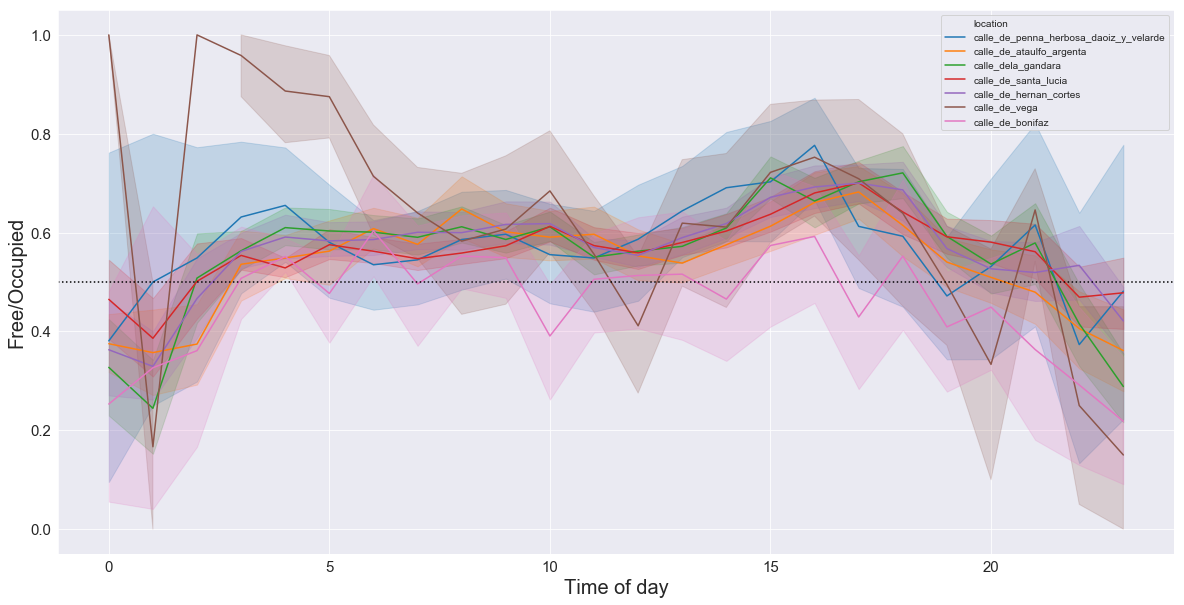

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set_style("darkgrid")
sns.lineplot(x= 'tod', y='vals', hue="location",data=a)
plt.axhline(y=0.5, color='black', linestyle=':')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Free/Occupied', fontsize=20)
ax.set_xlabel('Time of day', fontsize=20)

## calculating the time parking spots are occupied throughout the day

In [231]:
t = df_surface_parking_sensors
t = t.tz_localize(None)
t

,Unnamed: 0,_id,ayto:latitude,ayto:longitude,ayto:status,ayto:type,dc:identifier,latestUpdate,uri
dc:modified,,,,,,,,,
2018-05-09 12:55:17,0,5af2f015e4195406893c9927,43.462918,-3.803268,0,parking,3614,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:55:07,1,5af2f015e4195406893c9928,43.462925,-3.803205,0,parking,3615,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:54:15,2,5af2f015e4195406893c9929,43.463244,-3.799930,1,parking,3646,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:53:57,3,5af2f015e4195406893c992a,43.463078,-3.801646,1,parking,3629,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:53:29,4,5af2f015e4195406893c992b,43.463249,-3.799871,1,parking,3647,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:53:19,5,5af2f015e4195406893c992c,43.462970,-3.802751,1,parking,3912,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:52:55,6,5af2f015e4195406893c992d,43.463209,-3.800278,0,parking,3640,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:52:49,7,5af2f015e4195406893c992e,43.463256,-3.799819,0,parking,3648,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...
2018-05-09 12:52:23,8,5af2f015e4195406893c992f,43.462505,-3.800259,0,parking,3720,2018-05-09 13:56:53,http://datos.santander.es/api/datos/sensores_s...


In [232]:
s = t.loc['2018-05-09':'2018-08-14']
s.sort_index(inplace=True)



/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [233]:
# s.reset_index(inplace = True)
s = s.groupby(['dc:modified','dc:identifier', 'ayto:status']).count().reset_index()
temp = s[s['dc:identifier']==3608].reset_index()
temp['dc:modified'] =  pd.to_datetime(temp['dc:modified'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')


In [234]:
# parking = pd.DataFrame(columns = ['id','day', 'weekday', 'tod', 'remained_occupied_for'])
parking_0 = pd.DataFrame(columns = ['id','day', 'weekday', 'tod', 'remained_occupied_for'])
for j in s['dc:identifier'].unique():
    temp = s[s['dc:identifier']==j].reset_index()
    temp['dc:modified'] =  pd.to_datetime(temp['dc:modified'],
                                                              format='%Y-%m-%dT%H:%M:%S.%f')
    ix = 0

    for i in range(1, len(temp)):
        if temp.iloc[i]['dc:modified'].day == temp.iloc[i-1]['dc:modified'].day:
            if temp.iloc[ix]['ayto:status'] != temp.iloc[i]['ayto:status']:
                diff = (temp.iloc[i]['dc:modified'] - temp.iloc[ix]['dc:modified']).seconds/60
                ix = i
                if temp.iloc[ix]['ayto:status'] == 0:
                    parking_0.loc[len(parking_0)]  = [j, temp.iloc[i]['dc:modified'].day,
                                                  temp.iloc[i]['dc:modified'],
                                                 temp.iloc[i]['dc:modified'].hour,
                                                 diff]
                
        else:
            ix = i
 
    


In [77]:
parking = pd.read_csv('/Users/tbantis/Desktop/python/notebooks/parking_remained_occupied_for.csv')
parking['weekday'] =  pd.to_datetime(parking['weekday'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')

# parking['weekday'] = parking['weekday'].dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')

parking[parking['remained_occupied_for']< 4]

,Unnamed: 0,id,day,weekday,tod,remained_occupied_for
9,9,3608,18,2018-05-18 06:14:45,6,3.733333
12,12,3608,23,2018-05-23 08:02:36,8,2.400000
37,37,3608,5,2018-06-05 06:09:23,6,2.300000
50,50,3608,10,2018-06-10 01:40:40,1,3.866667
59,59,3608,14,2018-06-14 08:29:58,8,1.300000
61,61,3608,14,2018-06-14 09:39:14,9,1.900000
66,66,3608,15,2018-06-15 06:21:07,6,3.666667
78,78,3608,25,2018-06-25 20:49:40,20,2.466667
85,85,3608,26,2018-06-26 23:17:09,23,2.000000
106,106,3608,3,2018-07-03 07:58:11,7,0.900000


In [78]:
parking['Date'] = pd.to_datetime(parking['weekday'])
t_parking = parking.set_index('Date')
t_parking['weekday'] = t_parking.index.weekday
t_parking = t_parking[t_parking.remained_occupied_for < 8]

Text(0.5, 70.0, 'Time of day')

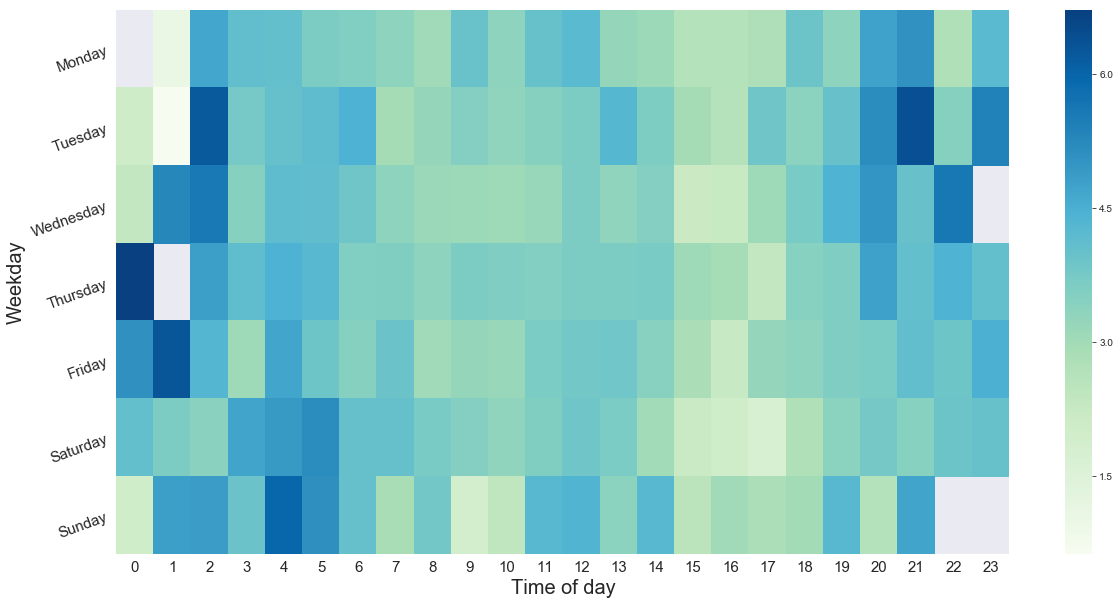

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))

heat = pd.pivot_table(t_parking[['weekday', 'tod', 'remained_occupied_for']],
               values='remained_occupied_for', index='weekday', columns='tod')

sns.heatmap(heat, cmap="GnBu")

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


ax.set_yticklabels(days)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15,rotation = 20)
ax.set_ylabel('Weekday', fontsize=20)
ax.set_xlabel('Time of day', fontsize=20)

Text(0.5, 233.08, 'Time of day')

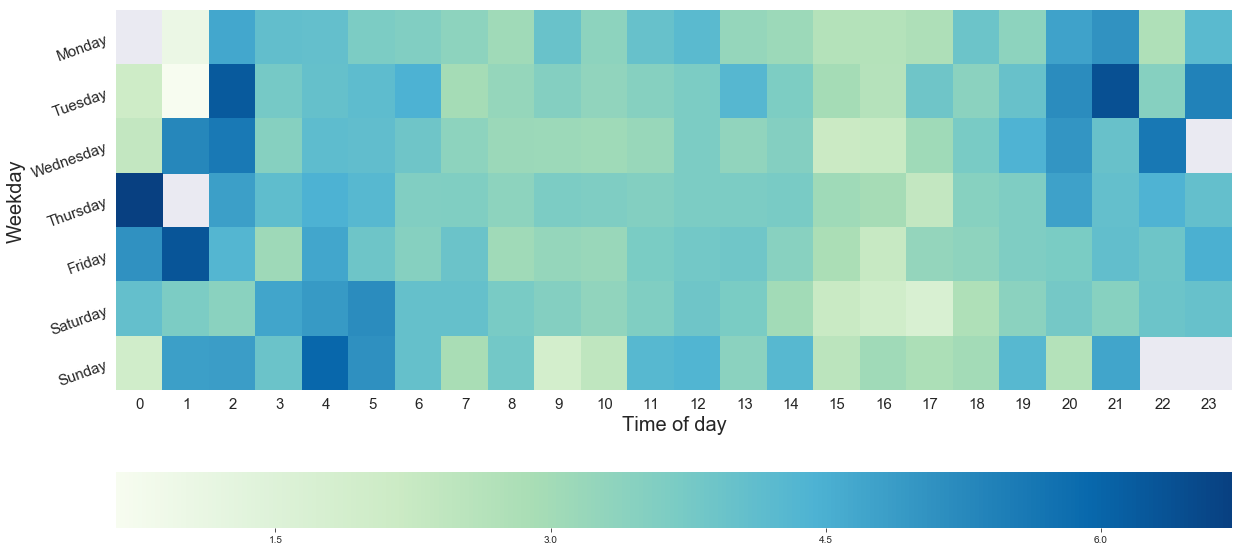

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))

heat = pd.pivot_table(t_parking[['weekday', 'tod', 'remained_occupied_for']],
               values='remained_occupied_for', index='weekday', columns='tod')

sns.heatmap(heat, cmap="GnBu",cbar_kws = dict(use_gridspec=False,location="bottom"))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


ax.set_yticklabels(days)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15,rotation = 20)
ax.set_ylabel('Weekday', fontsize=20)
ax.set_xlabel('Time of day', fontsize=20)

In [413]:
n_parking0['weekday'] = pd.to_datetime(n_parking0['weekday'])
t_parking = n_parking.set_index('weekday')
# t_parking = t_parking.groupby(by=[pd.TimeGrouper('60min')]).mean().reset_index()


In [414]:
t_parking = t_parking[t_parking.remained_occupied_for < 4]


In [415]:
t_parking.reset_index(inplace=True)


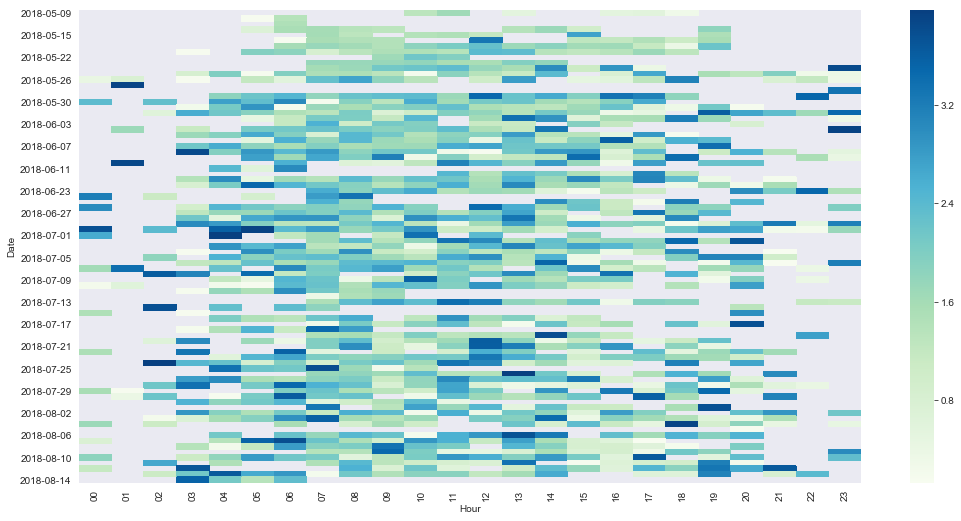

In [416]:
import seaborn as sns

fig, ax = plt.subplots(1,1)


t_parking['Date'] = t_parking.weekday.apply(lambda x: str(x).split(" ")[0])
t_parking['Hour'] = t_parking.weekday.apply(lambda x: str(x).split(" ")[1].split(":")[0])

t_parking = pd.pivot_table(t_parking, values='remained_occupied_for', index='Date', columns='Hour')

sns.heatmap(t_parking, cmap="GnBu")
fig.set_size_inches(17.53,8.69)


## Map of busyness

In [510]:
d = s[['ayto:latitude', 'ayto:longitude', 'dc:identifier']].reset_index(drop=True)
d.drop_duplicates(inplace=True)
d.reset_index(inplace=True, drop=True)

In [511]:
e = parking[(parking.tod > 6) &  (parking.tod <= 12)]
e = e.groupby(['id']).mean()
e.reset_index(inplace=True)

In [512]:
d['dc:identifier'] = d['dc:identifier'].astype(int)
e['id'] = e['id'].astype(int)

results=e.merge(d,left_on='id',
                      right_on='dc:identifier',
                      how='right')

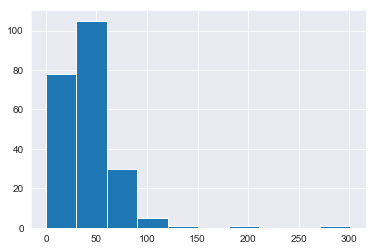

In [514]:
results.remained_occupied_for.hist()

In [515]:
results[results.remained_occupied_for < 150].to_csv('/Users/tbantis/Desktop/synchronicity_jupyter_data/synchronicity_jupyter_data/parking_morning.csv')

In [48]:
import mplleaflet
results = results.dropna()

plt.scatter(results['ayto:longitude'].values,results['ayto:latitude'].values,
            s=results['remained_occupied_for'].values, color='black', alpha=0.3) 
mplleaflet.display(tiles='cartodb_positron')


In [4]:
import pandas as pd
parking = pd.read_csv('parking_remained_occupied_for.csv')


## Histogram of proportion of spaces being used/taken (proxy=busy for more than 45 minutes)

In [177]:
remained_occupied_for = pd.read_csv('parking_remained_occupied_for.csv')
remained_occupied_for['weekday'] = pd.to_datetime(remained_occupied_for['weekday'])
# remained_occupied_for['weekday'] = remained_occupied_for['weekday'].dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
remained_occupied_for['tod'] = remained_occupied_for.weekday.apply(lambda x: x.hour)
remained_occupied_for['week'] = remained_occupied_for.weekday.apply(lambda x: x.weekday())

In [240]:
parking_remained_free_for = pd.read_csv('parking_remained_free_for.csv')
parking_remained_free_for['weekday'] = pd.to_datetime(parking_remained_free_for['weekday'])
# remained_occupied_for['weekday'] = remained_occupied_for['weekday'].dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
parking_remained_free_for['tod'] = parking_remained_free_for.weekday.apply(lambda x: x.hour)
parking_remained_free_for['week'] = parking_remained_free_for.weekday.apply(lambda x: x.weekday())

68


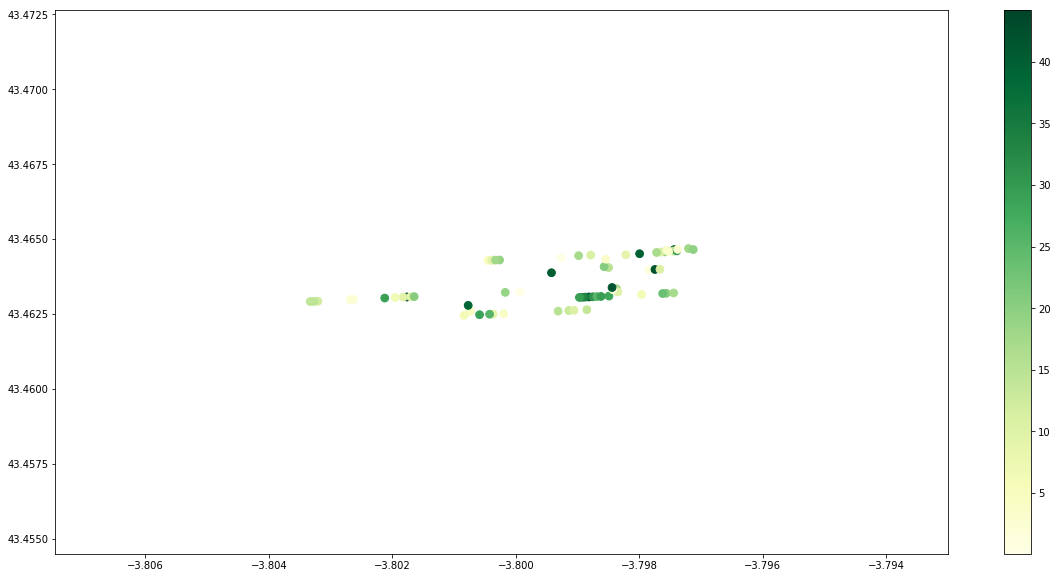

In [303]:
import mplleaflet
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))

free_at_16 = parking_remained_free_for[(parking_remained_free_for['remained_empty_for'] < 45) & \
                                   (parking_remained_free_for['tod'].isin([8]))  & (parking_remained_free_for['week'].isin([0]))] 
                                   

results= pd.merge(free_at_16, df_surface_parking_sensors.drop_duplicates('dc:identifier')[['dc:identifier',
                                                                                 'ayto:latitude',
                                                                                 'ayto:longitude']], left_on='id',
               right_on='dc:identifier', how='left')

results = results.drop_duplicates('id')

print(len(results))
cm = plt.cm.get_cmap('YlGn')
cmap_reversed = plt.cm.get_cmap('YlGn_r')
s = plt.scatter(results['ayto:longitude'].values,results['ayto:latitude'].values,
            s= 60,  c=(results['remained_empty_for'].values), cmap=cm, alpha=1) 
# mplleaflet.display(tiles='cartodb_positron')


plt.colorbar(s)


In [304]:
fig, ax = plt.subplots(figsize=(25, 10))



    
            
# for i in df_surface_parking_sensors['dc:identifier'].unique():
#     plt.scatter(float(df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier'] == i]['ayto:latitude'].iloc[0]),
#                                           float(df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier'] == i]['ayto:longitude'].iloc[0]),
#             c='black', s=10)

ref = df_surface_parking_sensors.drop_duplicates('dc:identifier')[['dc:identifier',
                                                                                 'ayto:latitude',
                                                                                 'ayto:longitude']]

plt.scatter(ref['ayto:longitude'].values,ref['ayto:latitude'].values, c='black', s=5, zorder=0)

s = plt.scatter(results['ayto:longitude'].values,results['ayto:latitude'].values,
            s= 70,  c=(results['remained_empty_for'].values), cmap=cm,
                alpha=1,zorder=1) 

                       
            
mplleaflet.display(tiles='cartodb_positron')
            
    

36


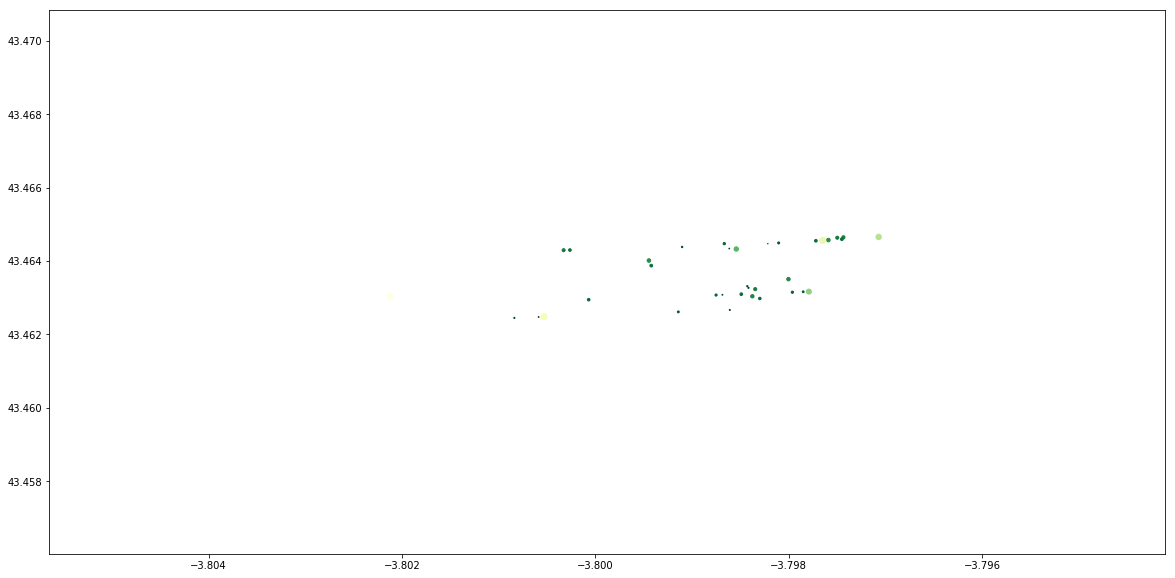

In [225]:
import mplleaflet
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))

free_at_16 = remained_occupied_for[(remained_occupied_for['remained_occupied_for'] < 45) & \
                                   (remained_occupied_for['tod'].isin([8]))  & (remained_occupied_for['week'].isin([6]))] 
                                   

results= pd.merge(free_at_16, df_surface_parking_sensors.drop_duplicates('dc:identifier')[['dc:identifier',
                                                                                 'ayto:latitude',
                                                                                 'ayto:longitude']], left_on='id',
               right_on='dc:identifier', how='left')

results = results.drop_duplicates('id')

print(len(results))
cm = plt.cm.get_cmap('YlGn')
cmap_reversed = plt.cm.get_cmap('YlGn_r')
s = plt.scatter(results['ayto:longitude'].values,results['ayto:latitude'].values,
            s= (results['remained_occupied_for'].values),  c=(results['remained_occupied_for'].values), cmap=cmap_reversed, alpha=1) 
# mplleaflet.display(tiles='cartodb_positron')


# plt.colorbar(s)


In [23]:
import mplleaflet
fig, ax = plt.subplots(figsize=(25, 10))



    
            
# for i in df_surface_parking_sensors['dc:identifier'].unique():
#     plt.scatter(float(df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier'] == i]['ayto:latitude'].iloc[0]),
#                                           float(df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier'] == i]['ayto:longitude'].iloc[0]),
#             c='black', s=10)

ref = df_surface_parking_sensors.drop_duplicates('dc:identifier')[['dc:identifier',
                                                                                 'ayto:latitude',
                                                                                 'ayto:longitude']]

plt.scatter(ref['ayto:longitude'].values,ref['ayto:latitude'].values, c='black', s=5, zorder=0)

# s = plt.scatter(results['ayto:longitude'].values,results['ayto:latitude'].values,
#             s= (results['remained_occupied_for'].values)*5,  c=(results['remained_occupied_for'].values), cmap=cm,
#                 alpha=0.9,zorder=1) 

                       
            
mplleaflet.display(tiles='cartodb_positron')
            
    

In [183]:
import geopandas as gpd

roads = gpd.read_file('/Users/tbantis/Desktop/synchronicity_jupyter_data/synchronicity_jupyter_data/mean_bus_speed.shp')

In [191]:
roads.dtypes

meanayto_1    float64
geometry       object
dtype: object

/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


AttributeError: Unknown property edgewidth

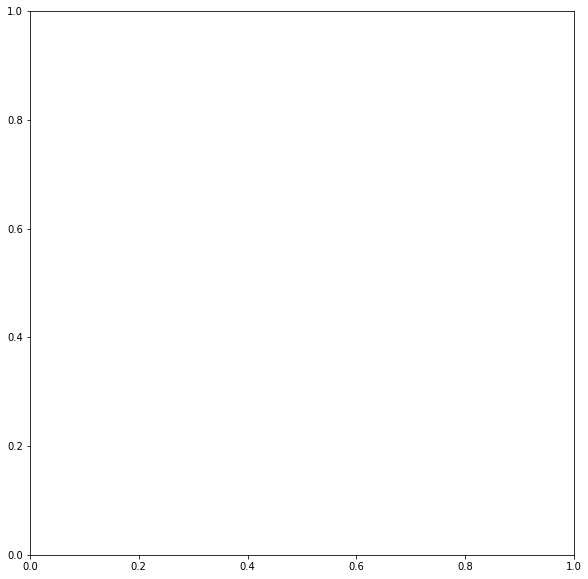

In [196]:
fig, ax = plt.subplots(figsize=(25, 10))

roads.plot(ax=ax, column = 'meanayto_1', cmap='Blues', edgewidth=1)

In [478]:
vals = []
for j in list(range(24)):
    temp = 0
    for name, group in  parking[parking['remained_occupied_for'] > 45].groupby(['tod', 'id']):
        if name[0] == j:
            temp = temp+1
    vals.append(temp)
    


Text(0.5, 0, 'Time of day')

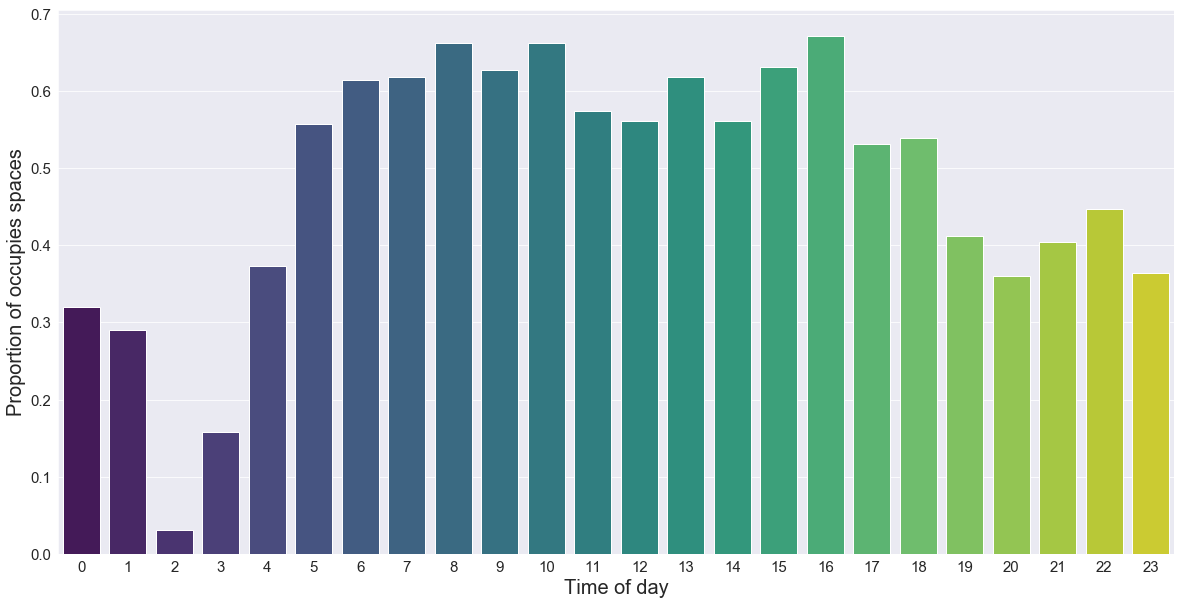

In [479]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set_style("darkgrid")
plt.bar(x = list(range(24)),
        height = np.array(vals)/len(parking.id.unique()))
sns.barplot(x=list(range(24)), y=np.array(vals)/len(parking.id.unique()),palette = 'viridis')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Proportion of occupies spaces', fontsize=20)
ax.set_xlabel('Time of day', fontsize=20)

Text(0.5, 0, 'Time of day')

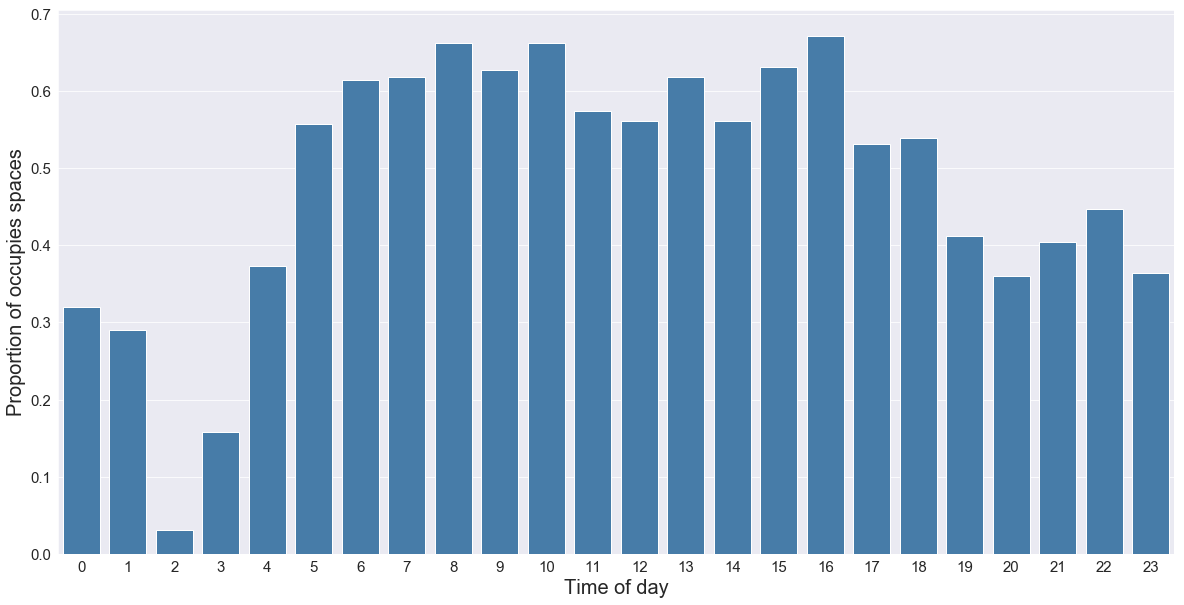

In [482]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set_style("darkgrid")
plt.bar(x = list(range(24)),
        height = np.array(vals)/len(parking.id.unique()))
sns.barplot(x=list(range(24)), y=np.array(vals)/len(parking.id.unique()), color='#377eb8')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Proportion of occupies spaces', fontsize=20)
ax.set_xlabel('Time of day', fontsize=20)

<BarContainer object of 24 artists>

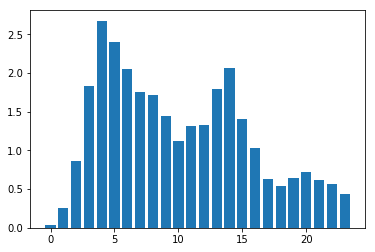

In [81]:
plt.bar(x = parking[parking['remained_occupied_for'] > 45].groupby('tod').count().index,
        height = parking[parking['remained_occupied_for'] > 45].groupby('tod').count()['remained_occupied_for']/len(parking.id.unique()))


## What is the proportion of free/not free per hour for each sensor?

In [27]:
parking['weekday'] = pd.to_datetime(parking['weekday'])
parking['day_of_week'] = parking.weekday.apply(lambda x: x.weekday())

grouped = parking.groupby(['id', 'day_of_week','tod']).mean()

In [28]:
f = grouped.reset_index()


In [29]:
f['percentage_occupied'] = f['remained_occupied_for']/60.*100

In [30]:
f['id'] = f['id'].apply(lambda x: str(x))


/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


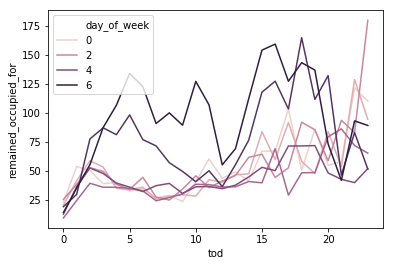

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.lineplot(x="tod", y="remained_occupied_for",
             hue="day_of_week", err_style=None, data=f)

# Finding the busyest bus stops

In [54]:
#### stop_arrival_times
#### plotting what hour is the busy-est by taking the frequency of bus arrivals per stop at each hour of day

In [5]:
db.stop_arrival_times.find().count()

11026029

In [8]:
list(db.surface_parking_sensors.find()[0:1])

[{'_id': ObjectId('5af2f015e4195406893c9927'),
  'ayto:latitude': '43.462917935',
  'ayto:longitude': '-3.803268448',
  'ayto:status': '0',
  'ayto:type': 'parking',
  'dc:identifier': '3614',
  'dc:modified': '2018-05-09T10:55:17Z',
  'latestUpdate': '2018-05-09 13:56:53',
  'uri': 'http://datos.santander.es/api/datos/sensores_smart_parking/3614.json'}]

0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1600000,1650000,1700000,1750000,1800000,1850000,1900000,1950000,2000000,2050000,2100000,2150000,2200000,2250000,2300000,2350000,2400000,2450000,2500000,2550000,2600000,2650000,2700000,2750000,2800000,2850000,2900000,2950000,3000000,3050000,3100000,3150000,3200000,3250000,3300000,3350000,3400000,3450000,3500000,3550000,3600000,3650000,3700000,3750000,3800000,3850000,3900000,3950000,4000000,4050000,

In [9]:
df_surface_parking_sensors
df_surface_parking_sensors['dc:modified'] =  pd.to_datetime(df_surface_parking_sensors['dc:modified'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')
grouped = df_surface_parking_sensors.set_index('dc:modified').groupby([pd.TimeGrouper('60min'), 'dc:identifier']).sum()


/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


ayto:latitude  \
dc:modified         dc:identifier                                                      
1970-01-01 00:00:00 3804           43.46424028443.46424028443.46424028443.4642402...   
                    3808           43.46408308343.46408308343.46408308343.4640830...   
                    3809           43.46404317543.46404317543.46404317543.4640431...   
                    3810           43.46399207243.46399207243.46399207243.4639920...   
                    3811           43.46395216343.46395216343.46395216343.4639521...   
                    3813           43.46386893943.46386893943.46386893943.4638689...   
2017-10-06 09:00:00 3652           43.46317169943.46317169943.46317169943.4631716...   
2017-10-25 13:00:00 3812           43.46391079543.46391079543.46391079543.4639107...   
2017-10-26 09:00:00 3807           43.46412591243.46412591243.46412591243.4641259...   
2017-10-26 10:00:00 3805           43.46420232243.46420232243.46420232243.4642023...   
                    3806           43.46416290143.46416290143.46416290143.4641629...   
2017-10-27 09:00:00 3819           43.46341193343.46341193343.46341193343.4634119...   
2017-10-31 07:00:00 3656           43.46319554843.46319554843.46319554843.4631955...   
2017-10-31 08:00:00 3707           43.46243317943.46243317943.46243317943.4624331...   
                    3734           43.46264635543.46264635543.46264635543.4626463...   
                    3735           43.46265219643.46265219643.46265219643.4626521...   
                    3736           43.46265803643.46265803643.46265803643.4626580...   
                    3898           43.46403052143.46403052143.46403052143.4640305...   
2017-11-23 08:00:00 3815           43.46358422343.46358422343.46358422343.4635842...   
2017-11-23 16:00:00 3816           43.46353944743.46353944743.46353944743.4635394...   
2017-11-29 07:00:00 3846           43.4640246843.4640246843.4640246843.4640246843...   
2017-12-04 14:00:00 3818           43.46345232943.46345232943.46345232943.4634523...   
2017-12-05 06:00:00 3796           43.4632185843.4632185843.4632185843.4632185843...   
2017-12-07 18:00:00 3625           43.46305469743.46305469743.46305469743.4630546...   
2017-12-08 01:00:00 3797           43.46317429143.46317429143.46317429143.4631742...   
2018-01-09 07:00:00 3793           43.46351703943.46351703943.46351703943.4635170...   
2018-01-19 14:00:00 3814           43.46362705243.46362705243.46362705243.4636270...   
2018-01-22 15:00:00 3726           43.46255388243.46255388243.46255388243.4625538...   
2018-01-26 14:00:00 3779           43.46424563843.46424563843.46424563843.4642456...   
2018-01-31 07:00:00 3786           43.4639584943.4639584943.4639584943.4639584943...   
...                                                                              ...   
2018-08-14 06:00:00 3662                                                43.462916961   
                    3665                                                43.462934969   
                    3667                                                 43.46294519   
                    3687                                                43.463505379   
                    3704                                                43.462662903   
                    3705                                                43.462627374   
                    3708                                    43.46243853343.462438533   
                    3713                                                43.462466762   
                    3721                                    43.46251007943.462510079   
                    3722                                    43.46253100743.462531007   
                    3731                                                43.462621534   
                    3733                                    43.46264197543.462641975   
                    3762                                    43.46323331543.463233315   
                    376

In [500]:
import geopandas as gpd

edges = gpd.read_file('/Users/tbantis/Desktop/synchronicity_jupyter_data/synchronicity_jupyter_data/network-shape/edges/mean_bus_speed_edge.shp')

/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


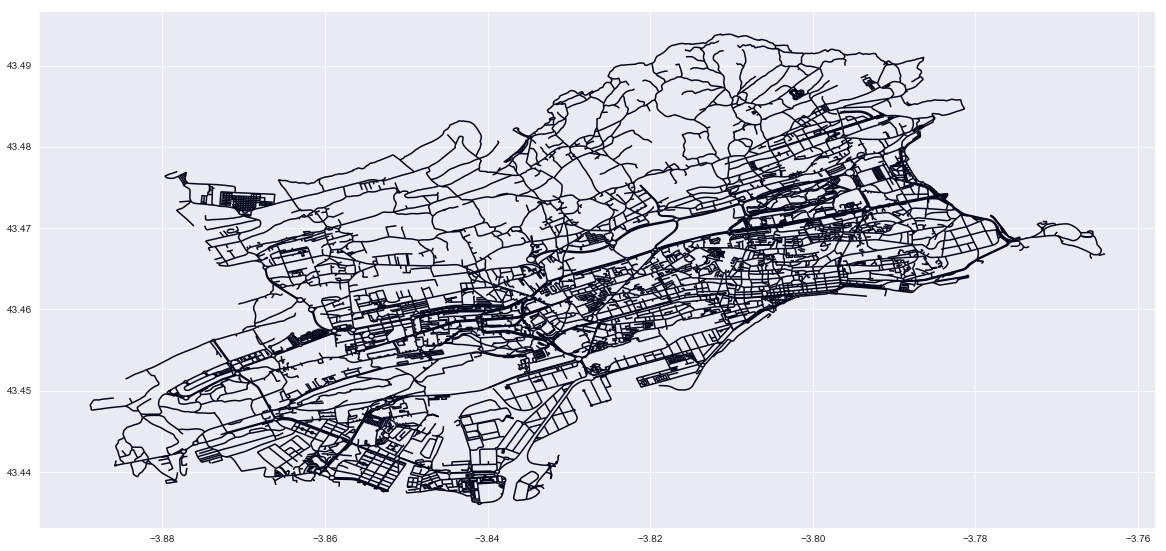

In [22]:
import folium

folium_map = folium.Map(location=[43.457, -3.8123],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
for i in df_surface_parking_sensors['dc:identifier'].unique():
    folium.CircleMarker(location=(float(df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier'] == i]['ayto:latitude'].iloc[0]),
                                          float(df_surface_parking_sensors[df_surface_parking_sensors['dc:identifier'] == i]['ayto:longitude'].iloc[0])),
                                radius=2,
                                color='#E37222',
                                fill=True).add_to(folium_map)
    
folium_map

In [61]:
df_stop_arrival_time = pd.DataFrame(columns = df_stop_arrival_time.columns)
for i in range(0, 11026029, 50000):
    print(i,end=',')
    temp = pd.DataFrame.from_dict(list(db.stop_arrival_times.find()[i:i+50000]),
                                              orient='columns')
    temp['ayto:tiempo1'] = temp['ayto:tiempo1'].apply(lambda x: int(x))
    temp = temp[temp['ayto:tiempo1'] < 120]
    df_stop_arrival_time = df_stop_arrival_time.append(temp)
    
df_stop_arrival_time.to_csv('df_stop_arrival_time.csv')

0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1600000,1650000,1700000,1750000,1800000,1850000,1900000,1950000,2000000,2050000,2100000,2150000,2200000,2250000,2300000,2350000,2400000,2450000,2500000,2550000,2600000,2650000,2700000,2750000,2800000,2850000,2900000,2950000,3000000,3050000,3100000,3150000,3200000,3250000,3300000,3350000,3400000,3450000,3500000,3550000,3600000,3650000,3700000,3750000,3800000,3850000,3900000,3950000,4000000,4050000,4100000,4150000,4200000,4250000,4300000,4350000,4400000,4450000,4500000,4550000,4600000,4650000,4700000,4750000,4800000,4850000,4900000,4950000,5000000,5050000,5100000,5150000,5200000,5250000,5300000,5350000,5400000,5450000,5500000,5550000,5600000,5650000,5700000,5750000,5800000,5850000,5900000,5950000,6000000,6050000,6100000,6150000,6200000,6250000,6300000,6350000,64

In [ ]:
df_stop_arrival_time = pd.read_csv('/Volumes/shared/LabAndInnovationTeam/Data Science/Personal backup/Thanos/synchronicity_backup/synchronicity_jupyter_data/df_bus_location.csv')

In [65]:
df_stop_arrival_time['ayto:fechActual'] =  pd.to_datetime(df_stop_arrival_time['ayto:fechActual'],
                                                          format='%Y-%m-%dT%H:%M:%S.%f')

In [100]:
df_bus_stop_locations = pd.DataFrame(list(db.bus_stop_locations.find()))
df_merged = pd.merge(df_stop_arrival_time, df_bus_stop_locations[['ayto:numero', 'wgs84_pos:lat','wgs84_pos:long']],
         how='left', left_on='ayto:paradaId', right_on='ayto:numero')

df_merged.drop_duplicates(inplace=True)

In [167]:
grouped = df_merged.set_index('ayto:fechActual').groupby([pd.TimeGrouper('D'), 'ayto:paradaId'])
grouped_hr = df_merged.set_index('ayto:fechActual').groupby([pd.TimeGrouper('H'), 'ayto:paradaId'])

/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
/Users/tbantis/Desktop/pr3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [ ]:
df_freq = grouped.count().reset_index()[['ayto:fechActual','ayto:paradaId','_id']]
df_freq_hr = grouped_hr.count().reset_index()[['ayto:fechActual','ayto:paradaId','_id']]
df_freq_hr = df_freq_hr.set_index(pd.DatetimeIndex(df_freq_hr['ayto:fechActual']))



In [247]:
import folium
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from datetime import timedelta
import seaborn as sns
sns.set(style="ticks", context="talk")
%matplotlib inline


widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

def plot_bus_stop_arrivals(x):
    
    folium_map = folium.Map(location=[43.457, -3.8123],
                            zoom_start=13,
                            tiles="CartoDB dark_matter")
    print(x)
    temp = df_freq[df_freq['ayto:fechActual'] == str(x.date())].reset_index()
    for index, row in temp.iterrows():
        try:
            folium.CircleMarker(location=(float(df_bus_stop_locations[df_bus_stop_locations['ayto:numero'] == int(row['ayto:paradaId'])]['wgs84_pos:lat'].iloc[0]),
                                          float(df_bus_stop_locations[df_bus_stop_locations['ayto:numero'] == int(row['ayto:paradaId'])]['wgs84_pos:long'].iloc[0])),
                                radius=float(row['_id'])/10.,
                                color='#E37222',
                                fill=True).add_to(folium_map)
        except Exception:
            pass


    mask = (df_freq_hr['ayto:fechActual'] > str(x.date())) & (df_freq_hr['ayto:fechActual'] <= str(x.date()+ timedelta(days=1)))
    temp2 = df_freq_hr.loc[mask].groupby([df_freq_hr.loc[mask].index.hour]).count()

    plt.plot(temp2.index, temp2['ayto:paradaId'].values)
    plt.xlabel('Hour of day')
    plt.ylabel('Bus arrivals')
    
    plt.show()
    
    return folium_map    

w = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

interact(plot_bus_stop_arrivals, x=w) 



<function __main__.plot_bus_stop_arrivals>

# Bus locations as a proxy for mean speeds in the city

In [252]:
df_bus_location = pd.DataFrame(columns = pd.DataFrame.from_dict(list(db.bus_location.find()[0:1]),
                                              orient='columns').columns)
for i in range(0, db.bus_location.find().count(), 50000):
    print(i,end=',')
    temp = pd.DataFrame.from_dict(list(db.bus_location.find()[i:i+50000]),
                                              orient='columns')

    df_bus_location = df_bus_location.append(temp)
    




0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000,1600000,1650000,1700000,1750000,1800000,1850000,1900000,1950000,2000000,2050000,2100000,2150000,2200000,2250000,2300000,2350000,2400000,2450000,2500000,2550000,2600000,2650000,2700000,2750000,2800000,2850000,2900000,2950000,3000000,3050000,3100000,3150000,3200000,3250000,3300000,3350000,3400000,3450000,3500000,

In [259]:
folium_map = folium.Map(location=[43.457, -3.8123],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

temp = df_bus_location[0:1000]
for index, row in temp.iterrows():
    folium.CircleMarker(location=(float(row['wgs84_pos:lat']),
                                  float(row['wgs84_pos:long'])),
                        radius=5,
                        color='#E37222',
                        fill=True).add_to(folium_map)


folium_map

In [269]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

df_bus_location['wgs84_pos:long'] = df_bus_location['wgs84_pos:long'].apply(lambda x: float(x))
df_bus_location['wgs84_pos:lat'] = df_bus_location['wgs84_pos:lat'].apply(lambda x: float(x))
geometry = [Point(xy) for xy in zip(df_bus_location['wgs84_pos:long'], df_bus_location['wgs84_pos:lat'])]
crs = {'init': 'epsg:4326'}

,_id,ayto:coche,ayto:estado,ayto:indice,ayto:instante,ayto:linea,ayto:servicio,ayto:vehiculo,ayto:velocidad,dc:modified,gn:coordX,gn:coordY,latestUpdate,uri,wgs84_pos:lat,wgs84_pos:long
0,5af2f014e4195406893c95f5,2,5,2,2018-05-09T12:55:37.693Z,4,0402,52,3.888000011444092,2018-05-09T12:56:13.75Z,435145.0,4812628.5,2018-05-09 13:56:52,http://datos.santander.es/api/datos/control_fl...,43.46187793120741,-3.8030294721480424
1,5af2f014e4195406893c95f6,2,5,1,2018-05-09T12:56:02.867Z,4,0402,52,7.271999835968018,2018-05-09T12:56:13.75Z,435186.78,4812609.5,2018-05-09 13:56:52,http://datos.santander.es/api/datos/control_fl...,43.46171048789231,-3.802510791408562
2,5af2f014e4195406893c95f7,2,5,0,2018-05-09T12:56:02.867Z,4,0402,52,7.271999835968018,2018-05-09T12:56:13.75Z,435186.78,4812609.5,2018-05-09 13:56:52,http://datos.santander.es/api/datos/control_fl...,43.46171048789231,-3.802510791408562
3,5af2f014e4195406893c95f8,2,5,3,2018-05-09T12:55:27.210Z,11,1102,69,5.4720001220703125,2018-05-09T12:56:13.749Z,433199.7,4812264.5,2018-05-09 13:56:52,http://datos.santander.es/api/datos/control_fl...,43.45842943331443,-3.8270295186083487
4,5af2f014e4195406893c95f9,2,5,2,2018-05-09T12:55:27.210Z,11,1102,69,5.4720001220703125,2018-05-09T12:56:13.749Z,433199.7,4812264.5,2018-05-09 13:56:52,http://datos.santander.es/api/datos/control_fl...,43.45842943331443,-3.8270295186083487


In [264]:
import osmnx as ox

# snapping bus GPS coordinates to OSM network coordinates
place = 'Santander, Spain'
network_type = 'walk'

G = ox.graph_from_place(place, network_type=network_type)



In [ ]:
# nodes = []
# x = []
# y = []
for i in range(2965407,len(df_bus_location)):
    point = (df_bus_location.iloc[i]['wgs84_pos:lat'], df_bus_location.iloc[i]['wgs84_pos:long'])
    orig_node = ox.get_nearest_node(G, point)
    x.append(G.node[orig_node]['x'])
    y.append(G.node[orig_node]['y'])
    if i%1000 ==0:
        print(i, end=',')


In [ ]:
df_bus_location['x_on_osm_network'] = x
df_bus_location['y_on_osm_network'] = y

In [315]:
df_bus_location.to_csv('df_bus_location.csv')

In [ ]:
# save file with osm coordinates to disk
df_bus_location = pd.read_csv('df_bus_location.csv')

In [320]:
# save osm to shapefile
ox.save_graph_shapefile(G, filename='network-shape')

In [ ]:
# spatial join edges, points to have speed on network
import geopandas as gpd

gdf_bus_location = gpd.read_file('df_bus_location.shp')
gdf_roads = gpd.read_file('edges.shp')
